In [1]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/'\
    'machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s, header = None, encoding = 'utf-8')
df.tail(10).to_string


From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


<bound method DataFrame.to_string of        0    1    2    3               4
140  6.7  3.1  5.6  2.4  Iris-virginica
141  6.9  3.1  5.1  2.3  Iris-virginica
142  5.8  2.7  5.1  1.9  Iris-virginica
143  6.8  3.2  5.9  2.3  Iris-virginica
144  6.7  3.3  5.7  2.5  Iris-virginica
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica>

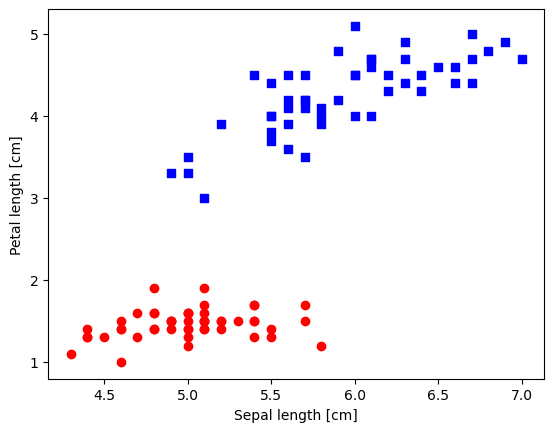

In [2]:
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
x = df.iloc[:100, [0, 2]].values
plt.figure(1)
plt.scatter(x[:50, 0], x[:50, 1], color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(x[50:, 0], x[50:, 1], color = 'blue', marker = 's', label = 'Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.show()

Text(0, 0.5, 'Number of updates')

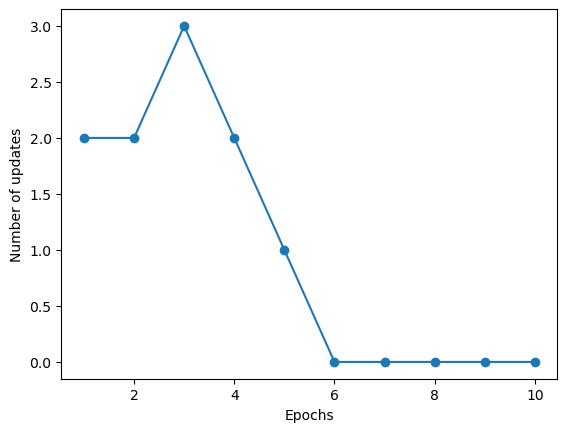

In [3]:
from Perceptron import Perceptron
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(x, y)
plt.figure(2)
plt.plot(np.arange(len(ppn.errors_)) + 1, ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

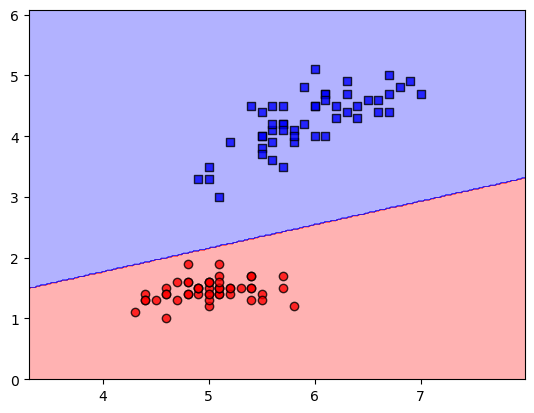

In [4]:

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    # x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_min, x_max = X.min(axis = 0) - 1, X.max(axis = 0) + 1
    xx1, xx2 = np.meshgrid(np.arange(x_min[0], x_max[0], resolution),
                           np.arange(x_min[1], x_max[1], resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
plot_decision_regions(x, y, classifier = ppn)